In [20]:
#In the top of the file we should import the libraries (good practice)

#this tells the computer to plot everything here
%matplotlib inline 

#Be able to show images saved in the hard drive
from IPython.display import Image 

#Read files
import pandas as pd

#Math
import numpy as np

#Data visualization
import seaborn as sns 
sns.set(font_scale=1.2)#make fonts 20% larger
sns.set_style("whitegrid")#white background

#Matplotlib, to edit labels, etc
import pylab as plt

# 1. Pandas I: Reading files
- Pandas will be our main library
- It allow us to read, merge, clean and transform files

**CSV = comma separated values file**
- The problem with csvs is that names inside your fields can have commas. A solution is to use quotes in all the fields. If you do this the computer undestands that commas inside quotes do not separate fields. Another solution is separate fields with tabs (\t)

**TSV = tab separated values file**
- However most people (including me) call them csv.
- An example of a csv:

`person    year    score
1    2000    8
2    2000    1
3    2000    3
1    2010    7
2    1010    3
`

**We use pandas to read them and save then in a data structure call dataframe**



## 1.1 pd.read_csv()
- Pandas function to read csv files.
- A function is a piece of code that takes as input some standard input and returns some standard output. 
- In this case, it takes as input  a file_name and return a DataFrame

**Other Examples**
- sorted() is also a function, that takes a list (e.g. [1,2,3]) as input and returns you the sorted list
- sum() is also a function, that takes a list (e.g. [1,2,3]) as input and returns the sum of its elements
- np.mean() is another

**Argument of a function **
- what it is inside the parenthesis are the arguments, they tell the function how to work

**Arguments of pd.read_csv()**
- **path (required, first argument, no need to write path=)**: `This is required, the name of the file. If inside a folder you need to write the name of the folder too. For instance if the file "example.csv" is inside the folder "data", you need to write data/example.csv `
- **sep (default ",")**`: "\t" for tab, "," for comma, ";" for semicolon, etc`
- **header (default 0)**`: 0 if the first line has column names. None if the first line has already data.`
- **skiprows (default 0)**`: number of lines to skip`
- **skipfooter (default 0)**`: number of lines to skip at the end`
- **usecols (default None)**`: what columns do you want to read? The default is all, but you can say ["column_x","column_y"]`
- **na_values (default None)**`: what other values should be considered missing (e.g. ["n.a.","-9","-999"])`
- **thousands (default None)**`: what is the thousands separator, usually there is None`
- **decimal (default ".")**`: Americans use "."; Europeans use ","; in science we use ".".`
- **encoding (default "UTF-8")**:  `"UTF-8" (great), "UTF-16", "ISO-8859-1" (W Europe), "SHIFT-JIS" (Japan), "ASCII" (US files)

In [2]:
#should be on top, here for reference

#First import required library
import pandas as pd

In [3]:
## Read csv
csv_frame = pd.read_csv("data/class1_test_csv.csv")
print(csv_frame.head(5))

   person  year  treatment  score
0       1  2000          1    4.0
1       2  2000          1    3.0
2       3  2000          2    6.0
3       4  2000          2    4.0
4       1  2005          1    8.0


In [4]:
#However jupyter notebooks show you what is inside your last command, so you can skip the print, and it looks nicer
csv_frame.head(5)

,person,year,treatment,score
0,1,2000,1,4.0
1,2,2000,1,3.0
2,3,2000,2,6.0
3,4,2000,2,4.0
4,1,2005,1,8.0


## 1.2 Reading excel or stata
- For excel files we have pd.read_excel
- For stata files we have pd.read_stata


In [5]:
## Read excel
excel_frame = pd.read_excel("data/class1_test_excel.xlsx")
excel_frame.head(5)

,person,year,treatment,score
0,1,2000,1,4
1,2,2000,1,3
2,3,2000,2,6
3,4,2000,2,4
4,1,2005,1,8


In [6]:
## Read stata
stataFrame = pd.read_stata("data/class1_test_stata.dta")
stataFrame.head(5)

,index,person,year,treatment,score
0,0,1,2000,1,4
1,1,2,2000,1,3
2,2,3,2000,2,6
3,3,4,2000,2,4
4,4,1,2005,1,8


## 1.3 Reading json and xml files
- For xml files we have pd.read_excel
- For stata files we have pd.read_stata


In [7]:
json_frame = pd.read_json("data/json_file.json")
json_frame.head(5)

#Another way to import them is as dictionaries (more on that later), using the library json

,first_name,city,state,postcode
0,Darwin,New Izaiah,Kansas,61607-8666
1,Estel,Lake Abdullahmouth,Pennsylvania,51581-0824
2,Art,Lake Caroline,Delaware,79963


In [8]:
json_xml = pd.read_xml("data/xml_file.xml")
json_xml.head(5)

,shape,degrees,sides
0,square,360,4.0
1,circle,360,NaN
2,triangle,180,3.0


# 2 Data visualization: A picture is worth a thousand words

Why do we visualize information?
- It's easier to read than a table
- We use it to:
    - Communicate information
    - Support our points

## 2.1 Example: Datasaurus

In [5]:
df = pd.read_csv("data/datasaurus.tsv",sep="\t")

#Print some statistics (this line is overcomplicated to avoid showing too much info)
stats = pd.concat([df.groupby("dataset").mean(),df.groupby("dataset").std()],axis=1)
stats.columns = ["Mean_x","Mean_y","Std_x","Std_y"]
stats

,Mean_x,Mean_y,Std_x,Std_y
dataset,,,,
away,54.266100,47.834721,16.769825,26.939743
bullseye,54.268730,47.830823,16.769239,26.935727
circle,54.267320,47.837717,16.760013,26.930036
dino,54.263273,47.832253,16.765142,26.935403
dots,54.260303,47.839829,16.767735,26.930192
h_lines,54.261442,47.830252,16.765898,26.939876
high_lines,54.268805,47.835450,16.766704,26.939998
slant_down,54.267849,47.835896,16.766759,26.936105
slant_up,54.265882,47.831496,16.768853,26.938608


/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:561: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


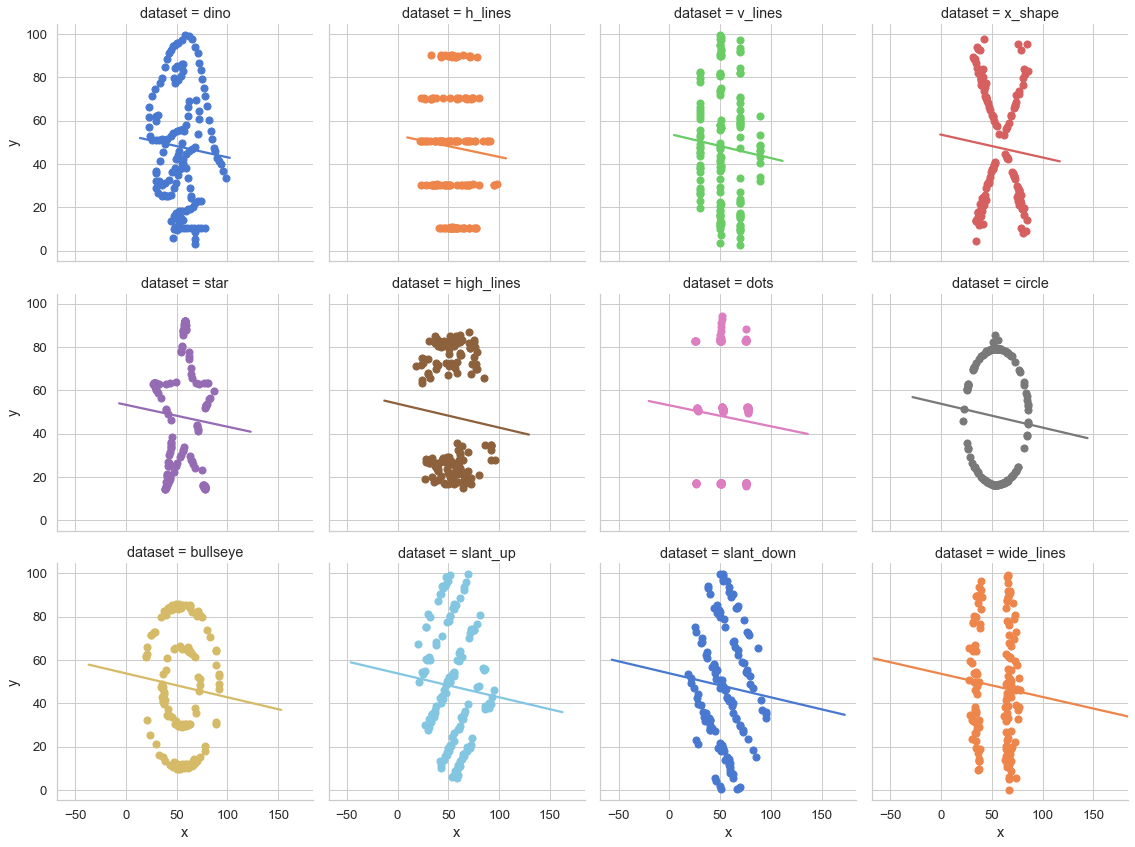

In [10]:

#Delete a dataset to have 12 instead of 13
df = df.loc[df["dataset"]!="away"]
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=4, ci=None, palette="muted", size=4, 
           scatter_kws={"s": 50, "alpha": 1})

## 2.2 Principles of data visualization for quantitative information
- You can use different channels

- Some channels are easily interpreted by our brain

- Some can be combined better than others

### 2.2.1 Now all plots are equally effective

Text(0.5, 1.0, 'How much more saturation?')

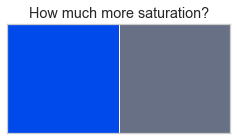

In [11]:
plt.figure(figsize=(4,2))
plt.bar([1,2],[2,2],width=[1,1],color=[(0/255,74/255,235/255),(103/255,112/255,132/255)])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0.5,2.5)
plt.title("How much more saturation?")

Text(0.5, 1.0, 'How much darker?')

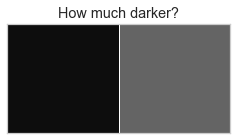

In [12]:
plt.figure(figsize=(4,2))
plt.bar([1,2],[2,2],width=[1,1],color=[(12.5/255,12.5/255,12.5/255),(100/255,100/255,100/255)])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0.5,2.5)
plt.title("How much darker?")

(0.6, 2.1)

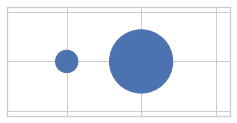

In [13]:
plt.figure(figsize=(4,2))
plt.scatter([1,1.5],[1,1],s=[500,4000])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.xlim(0.6,2.1)

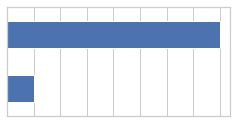

In [14]:
plt.figure(figsize=(4,2))
plt.barh([1,2],[1,8],0.5)
plt.xticks([1,2,3,4,5,6,7,8])
plt.yticks([])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0.5,2.5)
plt.show()

### 2.2.2 Channels to map information in a figure

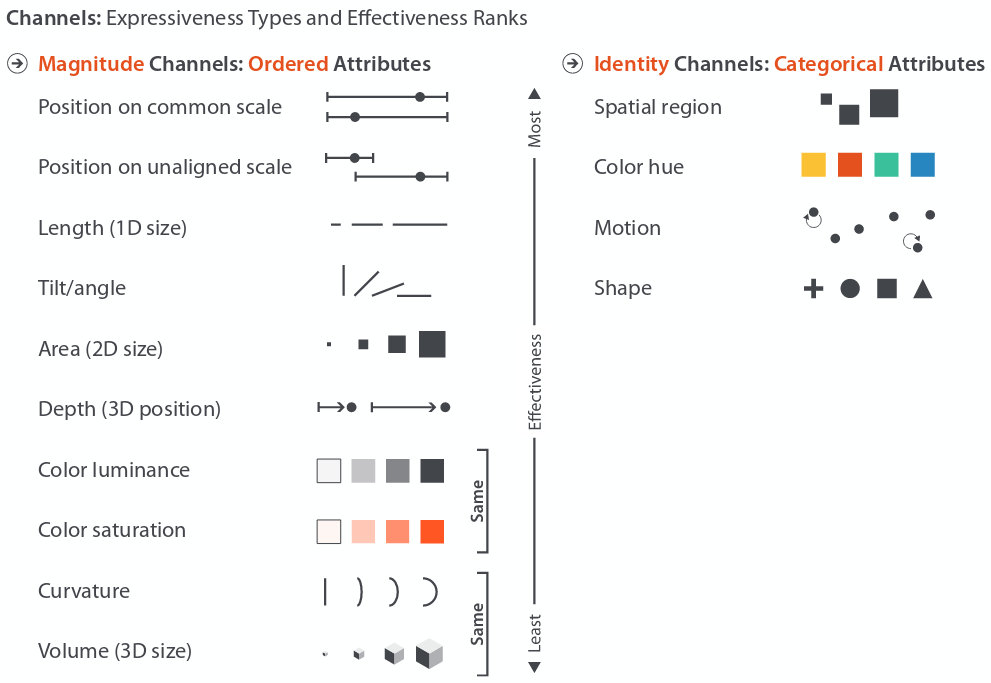

In [15]:
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image("images/channels.png",width=1000)

---

# 3 The pylab (matplotlib) and seaborn libraries: First plots

### There are many other visualizations tools:
- http://seaborn.pydata.org/examples/index.html (our standard library)
- https://pandas.pydata.org/pandas-docs/stable/visualization.html (some statistical plots)
- https://bokeh.pydata.org/en/latest/docs/gallery.html (interactive)
- https://plot.ly/ (interactive and online)

Finally!
- We will use the libraries matplotlib and seaborn.
- seaborn makes beautiful plots. matplotlib is easier (and it's the base of seaborn).

In [6]:
#should be on top, here for reference

#this tells the computer to plot everything here in the notebook
%matplotlib inline 

#importing this library makes the default colors be beautiful
import seaborn as sns 
sns.set(font_scale=1.2, style="whitegrid") #make fonts 20% larger #white background with a gray grid


#Matplotlib, to edit labels, etc
import pylab as plt

### Read the data
We're going to work with some data from the world bank, already (partially) cleaned by me
1.  Each variable forms a column.
2.  Each observation forms a row.

In [8]:
# Read data
df = pd.read_csv("data/world_bank_data.tsv",sep="\t")


#Keep observations for italy and sweden (don't worry about this now)
df_subset = df.loc[(df["Country"].isin(["IT","SE"])) & (df["Year"].isin([2005,2010]))]
df_subset.head()

,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,Country
1343,IT001,Rome,2005,9.98,NaN,NaN,50376.28,NaN,242.42,123101.38,0.48,676.60,NaN,7.35,IT
1348,IT001,Rome,2010,NaN,NaN,NaN,48383.29,NaN,232.70,116634.37,NaN,704.85,NaN,8.94,IT
1356,IT002,Milan,2005,8.01,NaN,NaN,55725.72,NaN,23.59,122273.36,1.16,1496.90,NaN,4.19,IT
1361,IT002,Milan,2010,NaN,NaN,NaN,58845.90,NaN,22.94,133943.44,NaN,1539.42,NaN,5.87,IT
1369,IT003,Naples,2005,7.01,NaN,NaN,23753.39,NaN,13.06,81551.26,0.18,2266.97,NaN,16.25,IT


# SEABORN summary
### One numeric variable + one categorical
`sns.catplot(data=df,x="numeric_var1",y="cat_var1",kind="box",hue="cat_var2",col="cat_var3",col_wrap=3,aspect=1.7,height=2)`
  - kind can be: 
    - For distributions: "box","violin","boxen","swarm","strip"
    - For compositions: "count"
    - For means/sums/etc: "bar"

### Two numeric variables
`sns.relplot(data=df,x="numeric_va1r",y="numeric_var2",kind="scatter",hue="cat_var1",col="cat_var2",col_wrap=3,aspect=1.7,height=2)`
  - kind can be: 
    - For trends: "line"
    - For relationships: "scatter" (you can add another numeric variable with sizes="numeric_var3"
  
### Two numeric variables + regression 
`sns.lmplot(data=df,x="numeric_var1",y="numeric_var2",hue="cat_var1",col="cat_var2",col_wrap=3,aspect=1.7,height=2)`
  - You can add different regression lines: e.g., lowess=True, or robust=True

## 3.1 CATPLOT: Information about ONE quantitative variable
- Distributions: Histogram, violinplot and box-plot
- Mean values: Bar plot

## READ THE DOCS!!! https://seaborn.pydata.org/generated/seaborn.catplot.html
Catplot calls specific functions, like violinplot (https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot), every argument that you could pass to violinplot you can also pass to catplot

### 3.1.1  -  BOX, VIOLIN, BOXEN, SWARM, STRIP plots


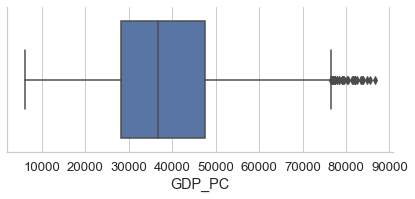

In [18]:
sns.catplot(x="GDP_PC",data=df,kind="box",
            aspect=2,height=3)

### 3.1.2 MEANS/SUMS: BAR-PLOT
- When are we interested on this:
    - We only are interested in one individual value either because 
        - We only have the value (e.g. the number of car accidents)
        - We are not so interested in the distribution and we don't want to clutter the plot. E.g. the mean number of car accidents. We need error bars in this case!
        
- This plot only make sense if we have many categories

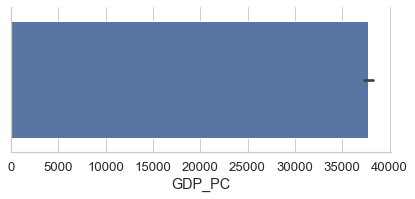

In [21]:
sns.catplot(x="GDP_PC",data=df,kind="bar",estimator=np.mean,
            aspect=2,height=3)

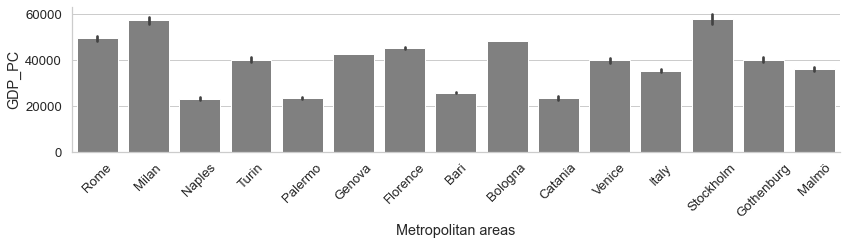

In [14]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_subset,kind="bar",
            aspect=4,height=3,color="gray")
g.set_xticklabels(rotation=45)

### Adding an extra categorical variable using HUE
- This works for all of them

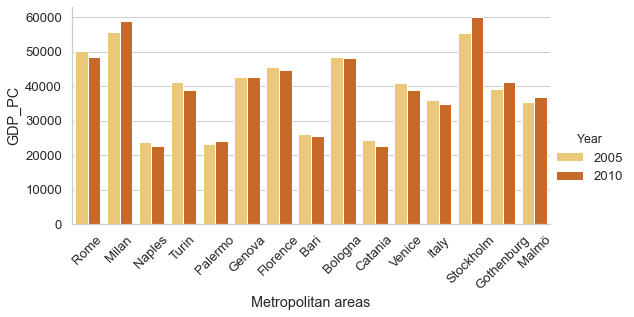

In [43]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_subset,kind="bar",hue="Year",palette="YlOrBr",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


### We can add an extra variable with COL
- Example for boxplot but it works for all

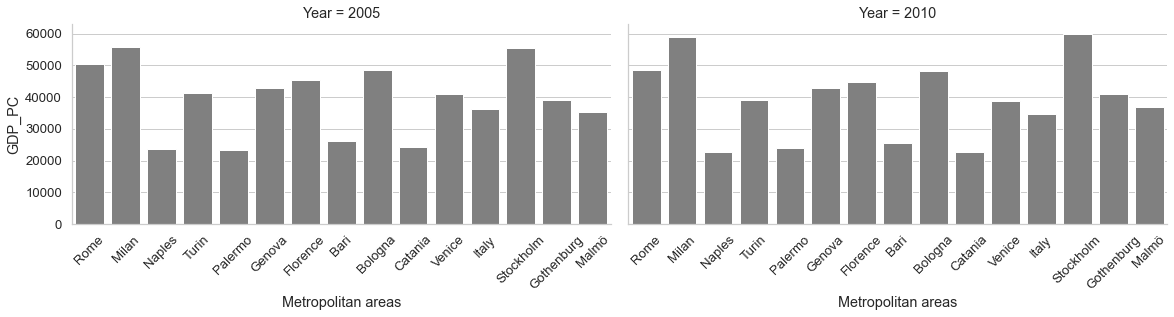

In [45]:
#In this case it doesn't make sense because you don't have cases of Rome in Sweden and Malmo in Italy, but to get the idea
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_subset,kind="bar",col="Year",col_wrap=4,#maximum number of plots in a column
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


# 3.2 RELPLOT: Information about TWO quantitative variables
- Scatter plot
- Line plot

## READ THE DOCS!!! https://seaborn.pydata.org/generated/seaborn.relplot.html


## 3.2.1 LINE PLOT
This is the most useful plot when the x variable is time. 
- Used to visualize relationship between two variables, one of them time

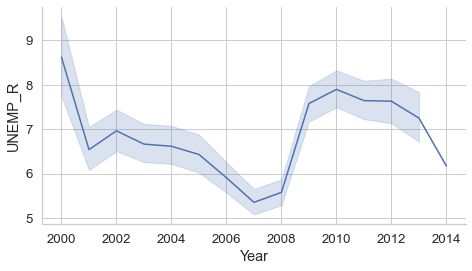

In [46]:
g = sns.relplot(x="Year", y="UNEMP_R", data=df, kind="line", 
                aspect=1.7,height=4)


## 3.2.2 SCATTER PLOT
This is the most useful plot. 
- Used to visualize relationship between two variables

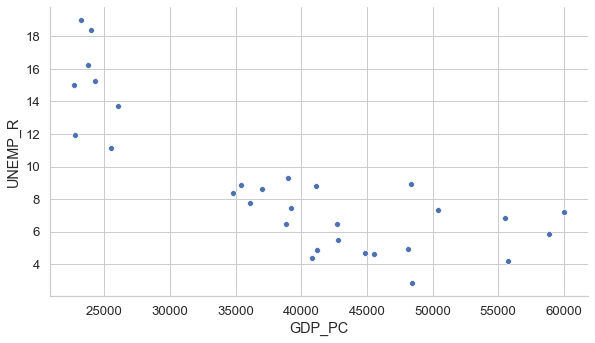

In [47]:
g = sns.relplot(x="GDP_PC", y="UNEMP_R", data=df_subset, kind="scatter", 
                aspect=1.7,height=5)


### Adding a categorical variable using color (HUE)

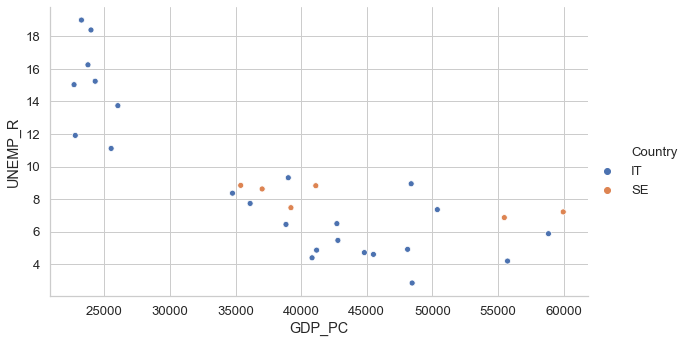

In [15]:
#Having more than 3-4 colors do not usually make sense
g = sns.relplot(x="GDP_PC", y="UNEMP_R",hue="Country", data=df_subset, kind="scatter", 
                aspect=1.7,height=5)


### Adding an extra categorical variable using size
- This works for all of them

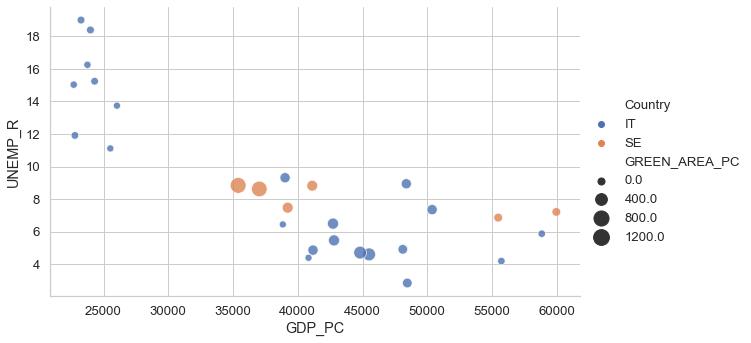

In [16]:
#Having more than 3-4 colors do not usually make sense
g = sns.relplot(x="GDP_PC", y="UNEMP_R",hue="Country", data=df_subset, kind="scatter", size="GREEN_AREA_PC",
                sizes=(50,250),alpha=0.8,
                aspect=1.7,height=5)


#### Adding an extra categorical variable using COL

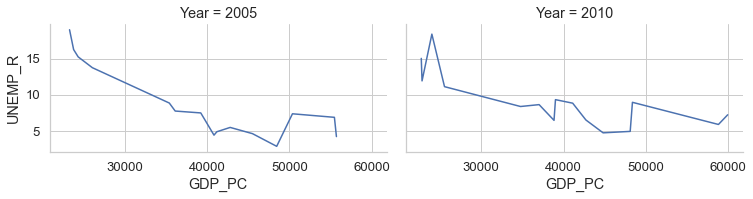

In [17]:
#Having more than 2-3 lines do not really make sense
g = sns.relplot(x="GDP_PC", y="UNEMP_R",col="Year", data=df_subset, kind="line", col_wrap=5,
                aspect=1.7,height=3)


# 3.3. LMPLOT: Regression plots
- Useful when you think there is a relationship between two variables

## READ THE DOCS!!! https://seaborn.pydata.org/generated/seaborn.lmplot.html


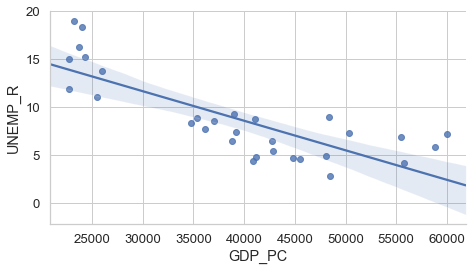

In [51]:
#Having more than 2-3 lines do not really make sense
g = sns.lmplot(x="GDP_PC", y="UNEMP_R", data=df_subset,
                aspect=1.7,height=4)


** And we can add a trendline **
- default: Fit linear
- order=2: Fit 2nd order polynomial
- logx=True -> Fit exponential
- robust=True -> Fit linear with outliers
- lowess=True -> trend line
- logistic=True -> fit logistic (y must be between 0 and 1)

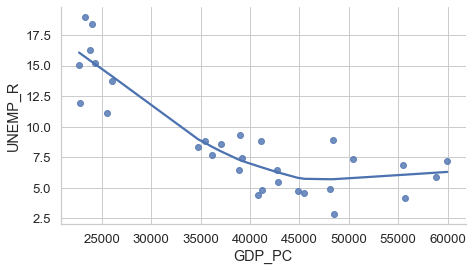

In [52]:
#Having more than 2-3 lines do not really make sense
g = sns.lmplot(x="GDP_PC", y="UNEMP_R", data=df_subset,lowess=True,
                aspect=1.7,height=4)


## 3.4 OTHER PLOTS
This is useful to see the relationship between many variables

## 3.4.1 JOINTPLOT = SCATTER + MARGINAL DISTRIBUTION
- Arguments like hue or col WILL NOT work here

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


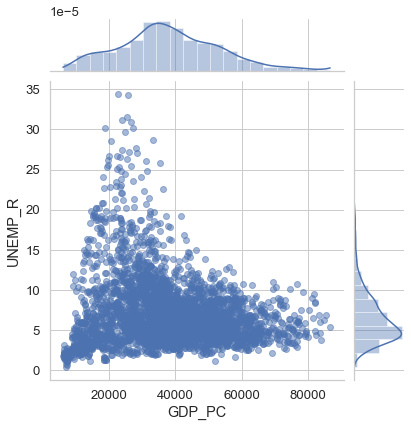

In [56]:
sns.jointplot(x="GDP_PC", y="UNEMP_R", data=df,
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}),
              size=6,alpha=0.5)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


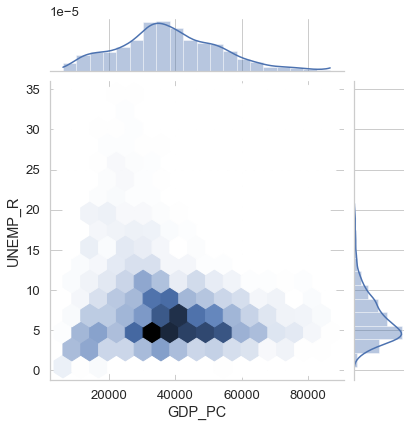

In [57]:
sns.jointplot(x="GDP_PC", y="UNEMP_R", data=df,kind="hex",
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}), 
              gridsize = 15,size=6)


## 3.4.2 POINTPLOT
- Similar to a line plot, but shows the central tendency

<AxesSubplot:xlabel='Year', ylabel='UNEMP_R'>

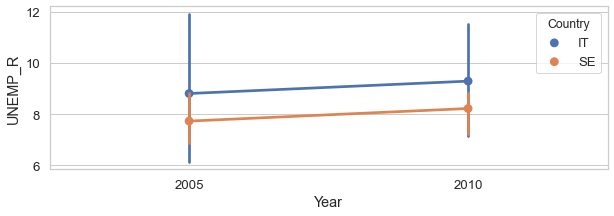

In [60]:
plt.figure(figsize=(10,3))
sns.pointplot(x="Year",y="UNEMP_R",hue="Country",data=df_subset)


## 3.4.3 SCATTER MATRIX
- Useful to describe the data, find outliers, etc

In [27]:
df_subset = df_subset.loc[:,["Metropolitan areas","CO2_PC","GDP_PC","GREEN_AREA_PC","POP_DENS","UNEMP_R"]].dropna()


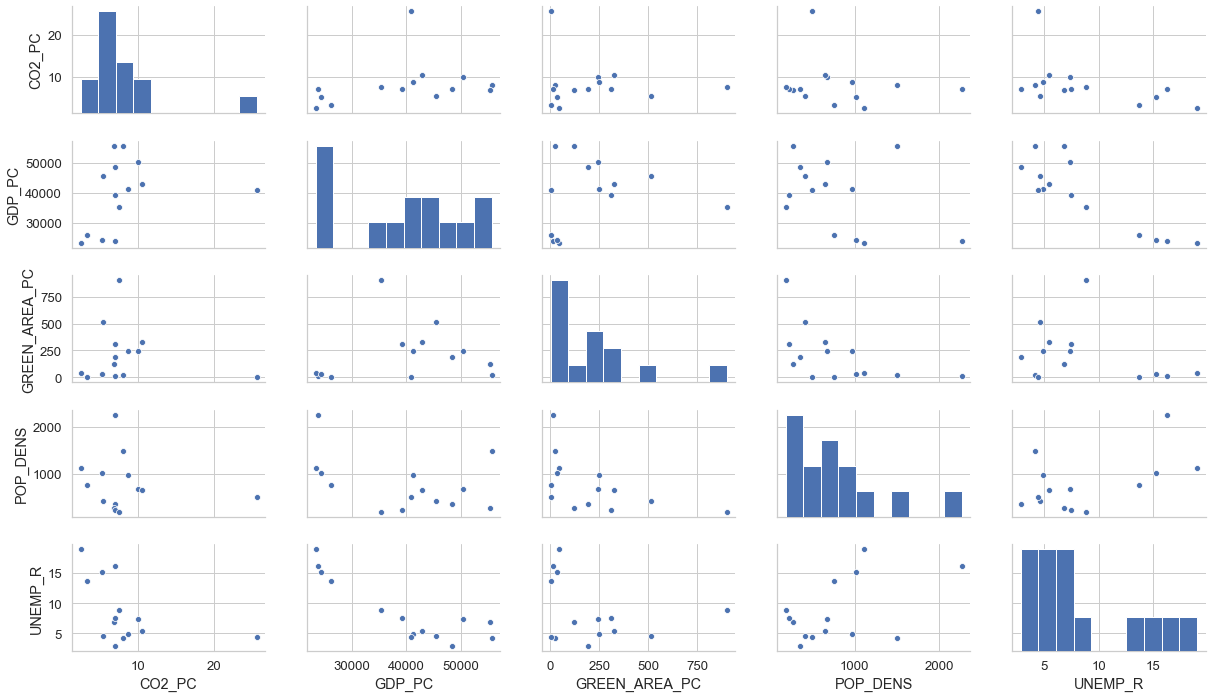

In [28]:
sns.pairplot(df_subset,
            aspect=1.7,height=2)#,hue="Metropolitan areas")


## 3.4.4 HEATMAP
This is useful to see the correlation between many variables in a summarized way

In [29]:
df_subset.head()

,Metropolitan areas,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
1343,Rome,9.98,50376.28,242.42,676.60,7.35
1356,Milan,8.01,55725.72,23.59,1496.90,4.19
1369,Naples,7.01,23753.39,13.06,2266.97,16.25
1382,Turin,8.72,41175.97,246.90,963.43,4.86
1395,Palermo,2.44,23256.63,44.89,1116.04,19.00


In [30]:
corr = df_subset.corr()
corr

,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
CO2_PC,1.000000,0.273688,-0.101762,-0.157586,-0.472859
GDP_PC,0.273688,1.000000,0.164103,-0.393390,-0.863326
GREEN_AREA_PC,-0.101762,0.164103,1.000000,-0.531376,-0.306152
POP_DENS,-0.157586,-0.393390,-0.531376,1.000000,0.500702
UNEMP_R,-0.472859,-0.863326,-0.306152,0.500702,1.000000


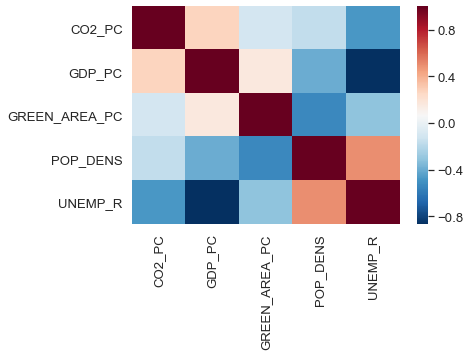

In [31]:
corr = df_subset.corr()
sns.heatmap(corr,cmap="RdBu_r")
plt.savefig("figures/example.pdf")
plt.savefig("figures/example.png")

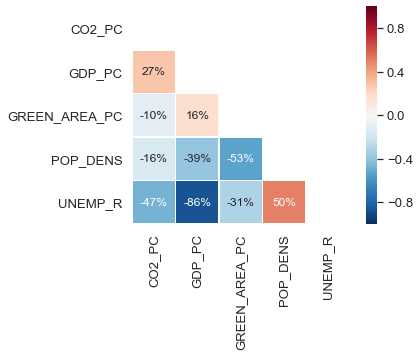

In [35]:
#A bit nicer

#Create a bit bigger figure
plt.figure(figsize=(6,4))

# Compute the correlation matrix
corr = df_subset.corr()

# Generate a mask for the upper triangle (hide the upper triangle)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,linewidths=.5,cmap="RdBu_r",vmin=-1,vmax=1,annot=True,fmt=".0%",annot_kws={"fontsize":12})

plt.show()

## 3.4.5 CLUSTERMAP

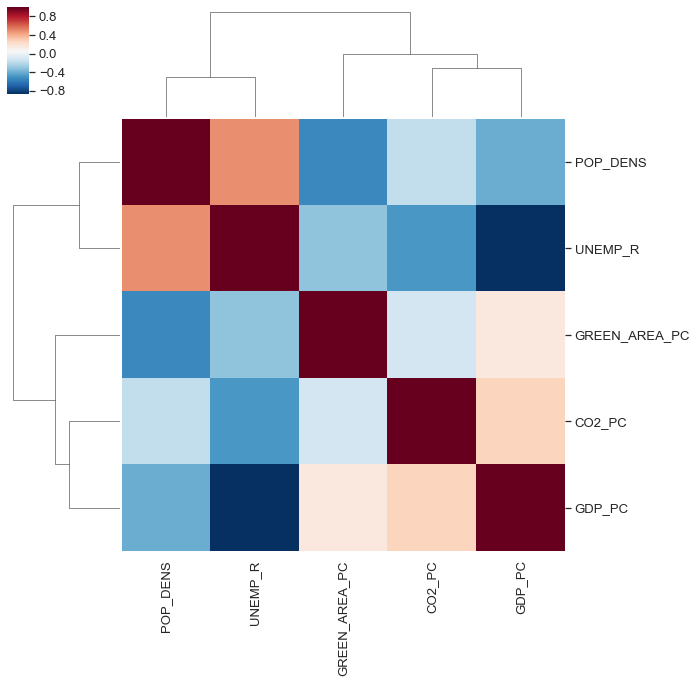

In [67]:
corr = df_subset.corr()
sns.clustermap(corr,cmap="RdBu_r")

## 3.4.6 HISTOGRAM

<AxesSubplot:xlabel='GDP_PC'>

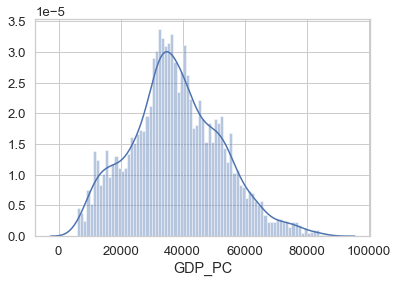

In [68]:
#Histogram
sns.distplot(df["GDP_PC"], 
             kde=True,
             rug=False,
             norm_hist=True,
             bins=range(1000,90000,1000)) #no missing values

# 4. Adapting labels with MATPLOTLIB (pylab)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


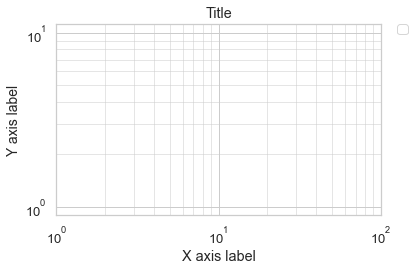

In [69]:
#add a title to the figure
plt.title("Title")

#add a label in the x and y axis
plt.xlabel("X axis label")
plt.ylabel("Y axis label",fontsize=14) #we can add the font size to all the functions where we pass text

#add a legend (by default in seaborn)
plt.legend()

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#use log scale in the x and y axis
plt.xscale("log")
plt.yscale("log")

#trim the x axis between 1 and 100 (to make it look like you want, it depends on your specific values)
plt.xlim((1,100))

#add minor ticks (vertical/horizontal lines) with tranparency 50%
plt.grid(which='minor',alpha=0.5)

#take out the grid
plt.grid(False)

#use horizontal grid only
plt.gca().grid(axis='x')  #plt.gca() looks at the figure that is displayed, and applies the function grid

#use vertical grid only
plt.gca().grid(axis='y')  #plt.gca() looks at the figure that is displayed, and applies the function grid

#save the figure (always use pdf!)
plt.savefig("figures/name_of_figure.pdf") 

#Make sure that the labels do not go outside the figures
plt.tight_layout()

#show the figure (not required in jupyter notebooks )
plt.show()




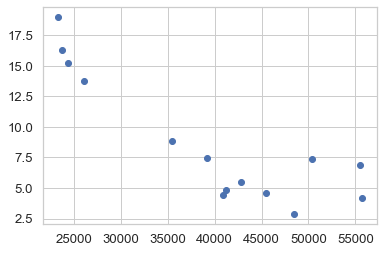

In [70]:
#Matplotlib allows you to create plots more carefully
plt.scatter(df_subset["GDP_PC"],
         df_subset["UNEMP_R"])



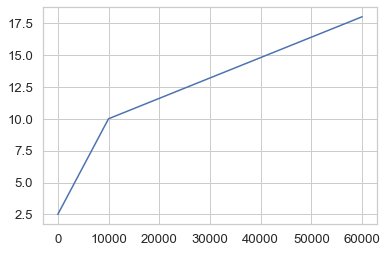

In [38]:
plt.plot([0,10000,60000],[2.5,10,18])

Text(20000, 12.5, 'Text')

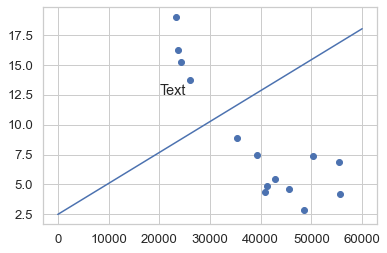

In [73]:
#Matplotlib allows you to create plots more carefully
plt.scatter(df_subset["GDP_PC"],
         df_subset["UNEMP_R"])
plt.plot([0,60000],[2.5,18])
plt.annotate("Text", (20000,12.5))

# 5. How to create an effective visualization
- Start with the idea of what you want to show: 
    - Which variables do you want to plot?
        - Continuous: Use length or position for the variables that need to be accurate. For less accurate variables color is okay.
        - Categorical: Use colors, shapes or both.
    - Which type of plot do you need?
        - Do you need to show distributions of categories? Maybe violinplot
        - Is it enough showing the mean and std? Maybe boxplot or barplot
        - Is there a relationship in the x-axis? Maybe a line plot
        - Is there not? Maybe a scatter plot
        - Is there geographical information? Maybe a map (probably combine it with a barplot if you have small countries)
    - Show the context:
        - Variability in the data (error bars)
        - Show the data, don't cheat with the axis.
   
- Think about the audience: 
    - Academic: They will read the caption and spend their time. You can condense information.
    - General public: You have 5 seconds to capture their attention. Simplify it and highlight the important information.

- Fix the last things with Inkscape (or Adobe Illustrator).
    - Save the figure always as pdf (or eps), so you can edit the parts separately.

- Follow this tips: https://www.tableau.com/about/blog/2016/5/5-tips-effective-visual-data-communication-54174
    - Less is more. Keep it simple! 
        - Do never use 3D bars or 3D effects that are not needed.
        - Take out as much ink as possible
    - Pretty doesn’t mean effective. It may be distracting.
    - Use color judiciously:
        - Color for Numerical Scales? Use with Caution. 
        - Leverage Color Associations 
        - Use Bright Colors to Highlight
    - Geographical data doesn’t imply a map (related to color for numerical scales, and to size of countries)
    - Check your viz with the 5-second rule 
   
- Look for inspiration online!
    - Beautiful visualizations on text analysis: http://textvis.lnu.se/
    - https://fivethirtyeight.com/features/the-52-best-and-weirdest-charts-we-made-in-2016/
    - Inequality: https://www.nytimes.com/2017/11/17/upshot/income-inequality-united-states.html?mc=adintl&mcid=Facebook&ad-keywords=IntlAudDev&subid1=TAFI